# LLM v. Non-LLM DQN for LunarLander

## Imports:

In [1]:
# IMPORT DESIRED INTERACTION CLASS AND CONFIGURATION
import sys
import os
#from dotenv import load_dotenv

# Load in OpenAI API key
#load_dotenv()
#openai_key = os.getenv("OPENAI_API_KEY")

# Get the parent directory (where `configs/` and `interactions/` are located)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.append(parent_dir)


# Now you should be able to import interactions folder
from interactions import dqn_interaction as dqn


ModuleNotFoundError: No module named 'LLM.local_LLM'

# No LLM Agent:

## Training:

In [ ]:
# Import Interaction Configs
from configs.interaction_configs.i_dqn_LL_default import dqn_lunar_lander_default_configs_dict

nollm_training_trials = []
nollm_trained_agents = []

for x in range(3):
  dqn_interaction = dqn.DQNInteraction(dqn_lunar_lander_default_configs_dict)
  train_scores, trained_agent = dqn_interaction.train()
  nollm_training_trials.append(train_scores)
  nollm_trained_agents.append(trained_agent)


INFO 03-22 16:15:20 __init__.py:207] Automatically detected platform cuda.
INFO 03-22 16:15:25 config.py:549] This model supports multiple tasks: {'classify', 'score', 'embed', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 03-22 16:15:25 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_exec

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:01<00:01,  1.14s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.18s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.02s/it]


INFO 03-22 16:15:31 model_runner.py:1115] Loading model weights took 12.8726 GB


INFO 03-22 16:15:32 worker.py:267] Memory profiling takes 0.39 seconds
INFO 03-22 16:15:32 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 03-22 16:15:32 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.16GiB; PyTorch activation peak memory takes 0.99GiB; the rest of the memory reserved for KV Cache is 111.83GiB.
INFO 03-22 16:15:32 executor_base.py:111] # cuda blocks: 15269, # CPU blocks: 546
INFO 03-22 16:15:32 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.64x
INFO 03-22 16:15:34 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s]

INFO 03-22 16:15:43 model_runner.py:1562] Graph capturing finished in 9 secs, took 0.30 GiB
INFO 03-22 16:15:43 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 11.28 seconds



100%|██████████| 50/50 [00:02<00:00, 20.07it/s]


INFO 03-22 16:15:46 config.py:549] This model supports multiple tasks: {'classify', 'score', 'embed', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 03-22 16:15:46 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=deepseek-ai/deepseek-llm-7b-chat

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:01<00:01,  1.14s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.18s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.02s/it]


INFO 03-22 16:15:51 model_runner.py:1115] Loading model weights took 12.8716 GB


INFO 03-22 16:15:51 worker.py:267] Memory profiling takes 0.22 seconds
INFO 03-22 16:15:51 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 03-22 16:15:51 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.96GiB; the rest of the memory reserved for KV Cache is 112.02GiB.
INFO 03-22 16:15:51 executor_base.py:111] # cuda blocks: 15294, # CPU blocks: 546
INFO 03-22 16:15:51 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.74x
INFO 03-22 16:15:51 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s]

INFO 03-22 16:16:00 model_runner.py:1562] Graph capturing finished in 9 secs, took 0.07 GiB
INFO 03-22 16:16:00 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 9.18 seconds



100%|██████████| 50/50 [00:02<00:00, 20.55it/s]


INFO 03-22 16:16:03 config.py:549] This model supports multiple tasks: {'classify', 'score', 'embed', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 03-22 16:16:03 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=deepseek-ai/deepseek-llm-7b-chat

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:01<00:01,  1.14s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.17s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.02s/it]


INFO 03-22 16:16:08 model_runner.py:1115] Loading model weights took 12.8716 GB


INFO 03-22 16:16:09 worker.py:267] Memory profiling takes 0.22 seconds
INFO 03-22 16:16:09 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 03-22 16:16:09 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.96GiB; the rest of the memory reserved for KV Cache is 112.02GiB.
INFO 03-22 16:16:09 executor_base.py:111] # cuda blocks: 15294, # CPU blocks: 546
INFO 03-22 16:16:09 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.74x
INFO 03-22 16:16:09 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]

INFO 03-22 16:16:17 model_runner.py:1562] Graph capturing finished in 9 secs, took 0.07 GiB
INFO 03-22 16:16:17 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 9.12 seconds



100%|██████████| 50/50 [00:02<00:00, 18.04it/s]


## Testing:

In [3]:
# Test the no-LLM agent
nollm_test_trials = []
for agent in nollm_trained_agents: 
  test_scores = dqn_interaction.test(trained_agent)
  nollm_test_trials.append(test_scores)

100%|██████████| 50/50 [00:01<00:00, 28.39it/s]


# LLM Agent:

## Training:

In [4]:
# Import Interaction Configs
from configs.interaction_configs.i_DQN_with_LLM import dqn_lunar_lander_llm_configs_dict

training_trials = []
trained_agents = []

for x in range(3):
  # Swap out configs for the run
  dqn_interaction = dqn.DQNInteraction(dqn_lunar_lander_llm_configs_dict)
  train_scores, trained_agent = dqn_interaction.train()
  training_trials.append(train_scores)
  trained_agents.append(trained_agent)

INFO 03-22 16:16:27 config.py:549] This model supports multiple tasks: {'classify', 'score', 'embed', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 03-22 16:16:27 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=deepseek-ai/deepseek-llm-7b-chat

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:01<00:01,  1.14s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.18s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.02s/it]


INFO 03-22 16:16:32 model_runner.py:1115] Loading model weights took 12.8716 GB


INFO 03-22 16:16:32 worker.py:267] Memory profiling takes 0.23 seconds
INFO 03-22 16:16:32 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 03-22 16:16:32 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.96GiB; the rest of the memory reserved for KV Cache is 112.02GiB.
INFO 03-22 16:16:32 executor_base.py:111] # cuda blocks: 15294, # CPU blocks: 546
INFO 03-22 16:16:32 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.74x
INFO 03-22 16:16:32 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:08<00:00,  3.99it/s]

INFO 03-22 16:16:41 model_runner.py:1562] Graph capturing finished in 9 secs, took 0.07 GiB
INFO 03-22 16:16:41 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 9.31 seconds



  0%|          | 0/50 [00:00<?, ?it/s]

INFO 03-22 16:16:41 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.
Unrecognized action: i will respond with the index corresponding to the action you want to take: 

* please specify the action you would like me to take.


100%|██████████| 50/50 [00:27<00:00,  1.80it/s]

INFO 03-22 16:17:09 config.py:549] This model supports multiple tasks: {'classify', 'score', 'embed', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 03-22 16:17:09 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=deepseek-ai/deepseek-llm-7b-chat

INFO 03-22 16:17:09 model_runner.py:1110] Starting to load model deepseek-ai/deepseek-llm-7b-chat...
INFO 03-22 16:17:10 weight_utils.py:254] Using model weights format ['*.bin']


Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:01<00:01,  1.14s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.18s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.03s/it]


INFO 03-22 16:17:14 model_runner.py:1115] Loading model weights took 12.8716 GB


INFO 03-22 16:17:14 worker.py:267] Memory profiling takes 0.24 seconds
INFO 03-22 16:17:14 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 03-22 16:17:14 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.96GiB; the rest of the memory reserved for KV Cache is 112.02GiB.
INFO 03-22 16:17:14 executor_base.py:111] # cuda blocks: 15294, # CPU blocks: 546
INFO 03-22 16:17:14 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.74x
INFO 03-22 16:17:14 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:09<00:00,  3.60it/s]

INFO 03-22 16:17:24 model_runner.py:1562] Graph capturing finished in 10 secs, took 0.07 GiB
INFO 03-22 16:17:24 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 10.33 seconds



  0%|          | 0/50 [00:00<?, ?it/s]

INFO 03-22 16:17:24 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


  2%|▏         | 1/50 [00:05<04:23,  5.37s/it]

Unrecognized action: i will respond with the index corresponding to the action you want to take: 

* please specify the action you would like me to take.


100%|██████████| 50/50 [00:22<00:00,  2.24it/s]


INFO 03-22 16:17:47 config.py:549] This model supports multiple tasks: {'classify', 'score', 'embed', 'reward', 'generate'}. Defaulting to 'generate'.
INFO 03-22 16:17:47 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='deepseek-ai/deepseek-llm-7b-chat', speculative_config=None, tokenizer='deepseek-ai/deepseek-llm-7b-chat', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=deepseek-ai/deepseek-llm-7b-chat

Loading pt checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading pt checkpoint shards:  50% Completed | 1/2 [00:01<00:01,  1.15s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.18s/it]
Loading pt checkpoint shards: 100% Completed | 2/2 [00:04<00:00,  2.03s/it]


INFO 03-22 16:17:52 model_runner.py:1115] Loading model weights took 12.8716 GB


INFO 03-22 16:17:53 worker.py:267] Memory profiling takes 0.23 seconds
INFO 03-22 16:17:53 worker.py:267] the current vLLM instance can use total_gpu_memory (139.84GiB) x gpu_memory_utilization (0.90) = 125.85GiB
INFO 03-22 16:17:53 worker.py:267] model weights take 12.87GiB; non_torch_memory takes 0.00GiB; PyTorch activation peak memory takes 0.96GiB; the rest of the memory reserved for KV Cache is 112.02GiB.
INFO 03-22 16:17:53 executor_base.py:111] # cuda blocks: 15294, # CPU blocks: 546
INFO 03-22 16:17:53 executor_base.py:116] Maximum concurrency for 4096 tokens per request: 59.74x
INFO 03-22 16:17:53 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utilization` or switching to eager mode. You can also reduce the `max_num_seqs

Capturing CUDA graph shapes: 100%|██████████| 35/35 [00:08<00:00,  4.01it/s]

INFO 03-22 16:18:01 model_runner.py:1562] Graph capturing finished in 9 secs, took 0.07 GiB
INFO 03-22 16:18:01 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 9.25 seconds



  0%|          | 0/50 [00:00<?, ?it/s]

INFO 03-22 16:18:02 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


  2%|▏         | 1/50 [00:05<04:51,  5.96s/it]

Unrecognized action: i will respond with the index corresponding to the action you want to take: 

* please specify the action you would like me to take.


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


## Testing:

In [5]:
# Test the no-LLM agent
test_trials = []
for agent in trained_agents: 
  test_scores = dqn_interaction.test(trained_agent)
  test_trials.append(test_scores)

100%|██████████| 50/50 [00:01<00:00, 46.96it/s]


# Analysis:

## Preprocess Data

In [6]:
# Get average of training and testing scores

import numpy as np

# First non-llm network
nollm_training_scores_avg = np.mean(np.array(nollm_training_trials), axis = 0)
nollm_training_scores_std = np.std(np.array(nollm_training_trials), axis = 0)

nollm_testing_scores_avg = np.mean(np.array(nollm_test_trials), axis = 0)
nollm_testing_scores_std = np.std(np.array(nollm_test_trials), axis = 0)

# Next LLM network
training_scores_avg = np.mean(np.array(training_trials), axis = 0)
training_scores_std = np.std(np.array(training_trials), axis = 0)

testing_scores_avg = np.mean(np.array(test_trials), axis = 0)
testing_scores_std = np.std(np.array(test_trials), axis = 0)

## Make Plots

### Training Scores

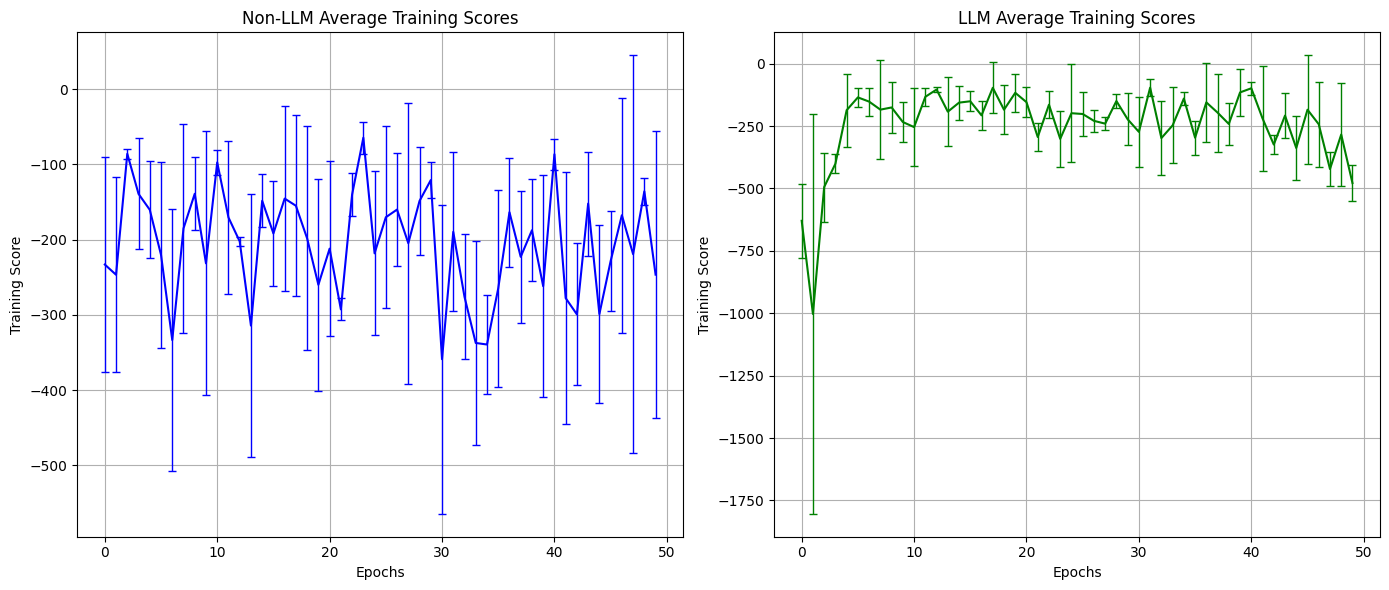

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,6))

# Plot for non-LLM training scores
ax1.errorbar(np.arange(len(nollm_training_scores_avg)), nollm_training_scores_avg, 
             yerr=nollm_training_scores_std, fmt='-', color='blue', label='Non-LLM', capsize=3, elinewidth= 1)
ax1.set_title("Non-LLM Average Training Scores")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training Score")
ax1.grid(True)

# Plot for LLM training scores
ax2.errorbar(np.arange(len(training_scores_avg)), training_scores_avg, 
             yerr=training_scores_std, fmt='-', color='green', label='LLM', capsize=3, elinewidth= 1)
ax2.set_title("LLM Average Training Scores")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Training Score")
ax2.grid(True)

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

### Testing Scores

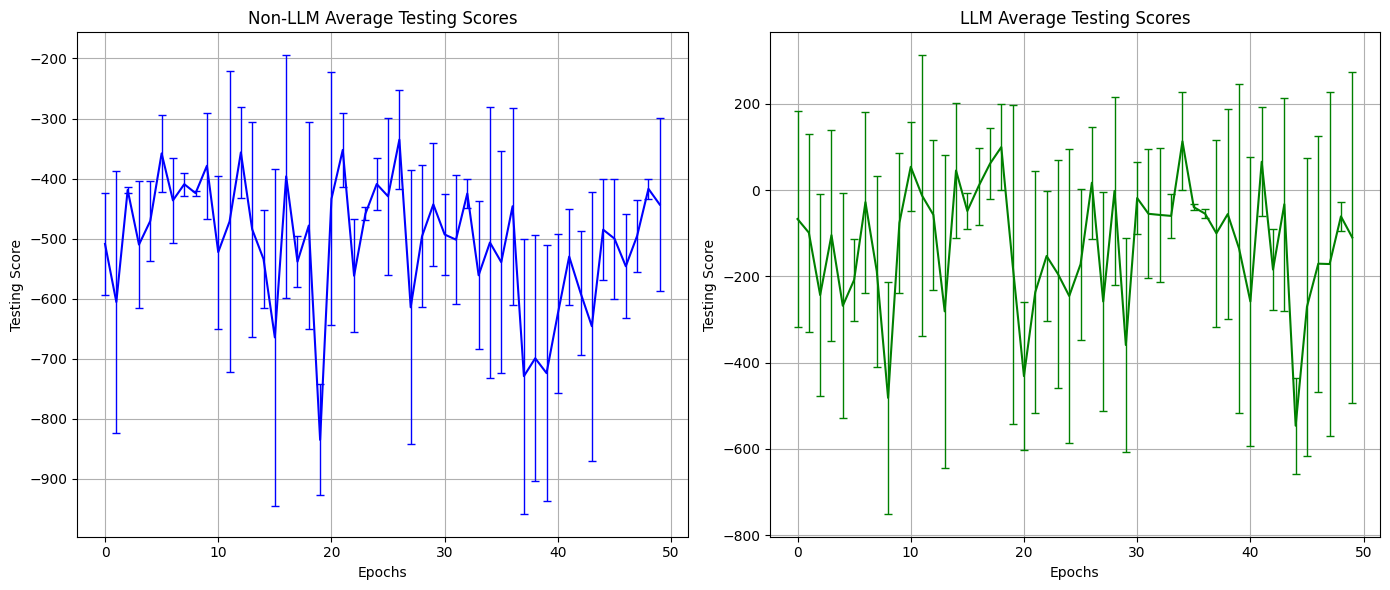

In [8]:
# Plot for testing scores

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for non-LLM testing scores
ax1.errorbar(np.arange(len(nollm_testing_scores_avg)), nollm_testing_scores_avg, 
             yerr=nollm_testing_scores_std, fmt='-', color='blue', label='Non-LLM', capsize=3, elinewidth= 1)
ax1.set_title("Non-LLM Average Testing Scores")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Testing Score")
ax1.grid(True)

# Plot for LLM testing scores
ax2.errorbar(np.arange(len(testing_scores_avg)), testing_scores_avg, 
             yerr=testing_scores_std, fmt='-', color='green', label='LLM', capsize=3, elinewidth= 1)
ax2.set_title("LLM Average Testing Scores")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Testing Score")
ax2.grid(True)

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()
